In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
norm = False # NORMALIZATION
scaler = StandardScaler()

# Model choice
models = ['use', 'stf', 'fasttext', 'glove', 'elmo']
model = models[4]
print(f'Using {model.upper()} model')

# Load the data
scores_df = pd.read_csv(f'/content/drive/MyDrive/STS Measures/scores/{model}_scores.csv', low_memory=False)
model_goals = pd.read_csv(f'/content/drive/MyDrive/STS Measures/scores/{model}_goals.csv', low_memory=False)
goals_df = pd.read_csv('/content/drive/MyDrive/STS Measures/scopus_data/gpt_goals.csv', low_memory=False)

# print(scores_df.head())
# print(goals_df.head())

Using ELMO model


In [ ]:
# Check for missing values
# print(scores_df.isnull().sum())
# print(goals_df.isnull().sum())

# Drop missing values as needed ## Redundant Step
scores_df = scores_df.dropna(subset=['Title', 'Abstract'])

# Convert similarity scores to numeric (if not already) ## Redundant Step
similarity_columns = [col for col in scores_df.columns if 'Goal_' in col]
scores_df[similarity_columns] = scores_df[similarity_columns].apply(pd.to_numeric, errors='coerce')

In [ ]:
if norm:
  scores_df[similarity_columns] = scaler.fit_transform(scores_df[similarity_columns])

In [ ]:
scores_df[similarity_columns].head()

# Remove _Similarity from column names
scores_df.columns = scores_df.columns.str.replace('_Similarity', '')

#Remove _Similarity from similarity_columns
similarity_columns = [col.replace('_Similarity', '') for col in similarity_columns]

,Goal_1_Similarity,Goal_2_Similarity,Goal_3_Similarity,Goal_4_Similarity,Goal_5_Similarity,Goal_6_Similarity,Goal_7_Similarity,Goal_8_Similarity,Goal_9_Similarity,Goal_10_Similarity,Goal_11_Similarity,Goal_12_Similarity,Goal_13_Similarity,Goal_14_Similarity,Goal_15_Similarity,Goal_16_Similarity,Goal_17_Similarity
0,0.652681,0.668697,0.644609,0.626915,0.569546,0.723682,0.767779,0.616185,0.747291,0.588285,0.765323,0.746683,0.725674,0.677163,0.704498,0.613246,0.730751
1,0.666007,0.710992,0.625192,0.584612,0.575664,0.726208,0.823855,0.664524,0.779473,0.646328,0.718844,0.781035,0.712817,0.661404,0.691530,0.660805,0.729653
2,0.599743,0.672534,0.612281,0.557138,0.528770,0.690353,0.782023,0.606609,0.720666,0.573206,0.700702,0.798337,0.726566,0.676568,0.694085,0.593607,0.725409
3,0.582475,0.622193,0.551683,0.528026,0.565007,0.658837,0.626578,0.586152,0.604025,0.581369,0.678329,0.685840,0.640267,0.626216,0.681016,0.578316,0.584348
4,0.442252,0.522288,0.478299,0.427219,0.411080,0.546196,0.580527,0.452244,0.545585,0.454520,0.555675,0.619774,0.540321,0.529672,0.551198,0.437620,0.506184


In [ ]:
average_similarity = (scores_df[similarity_columns].mean()).sort_values(ascending=False)
print(average_similarity)

Goal_12_Similarity    0.694476
Goal_11_Similarity    0.676972
Goal_7_Similarity     0.675992
Goal_9_Similarity     0.669242
Goal_17_Similarity    0.664794
Goal_13_Similarity    0.651830
Goal_6_Similarity     0.650827
Goal_15_Similarity    0.639187
Goal_2_Similarity     0.621967
Goal_14_Similarity    0.619040
Goal_3_Similarity     0.598823
Goal_10_Similarity    0.593735
Goal_16_Similarity    0.588396
Goal_8_Similarity     0.585561
Goal_1_Similarity     0.581097
Goal_4_Similarity     0.573491
Goal_5_Similarity     0.556929
dtype: float64


In [ ]:
scores_df['Average_Similarity'] = scores_df[similarity_columns].mean(axis=1)
top_5_papers = scores_df.nlargest(5, 'Average_Similarity')
print(top_5_papers[['Title', 'Average_Similarity']])

                                                   Title  Average_Similarity
20126  Study on the Potential of Virtual Power Plants...            0.817054
16152  Eco-Friendly Geopolymer Concrete: A Critical R...            0.802207
3980   Evaluation of Modern Smart Cities in South Asi...            0.797725
12931  Centering Meaning-Filled Design Within Enginee...            0.796191
18546  Design and Simulation of a Silicon Carbide MOS...            0.795594


# Max and Min Similarity

In [ ]:
scores_df['Min_Similarity'] = scores_df[similarity_columns].min(axis=1)
scores_df['Max_Similarity'] = scores_df[similarity_columns].max(axis=1)

# Identify the corresponding goals for these minimum and maximum scores
scores_df['Min_Similarity_Goal'] = scores_df[similarity_columns].idxmin(axis=1)
scores_df['Max_Similarity_Goal'] = scores_df[similarity_columns].idxmax(axis=1)

In [ ]:
scores_df['Min_Similarity_Goal'] = scores_df['Min_Similarity_Goal'].apply(lambda x: x.split('_')[0] + '_' + x.split('_')[1])
scores_df['Max_Similarity_Goal'] = scores_df['Max_Similarity_Goal'].apply(lambda x: x.split('_')[0] + '_' + x.split('_')[1])

In [ ]:
print(scores_df[['Title', 'Min_Similarity', 'Min_Similarity_Goal', 'Max_Similarity', 'Max_Similarity_Goal']].head())

                                               Title  Min_Similarity  \
0  HOLISTIC ASSESSMENT METHODOLOGY FOR POSITIVE E...        0.569546   
1  Sustainability Indicators for Biogas Productio...        0.575664   
2  Having More Access Leads to Better Welfare: St...        0.528770   
3  The Impact and Prevention of the Pandemic Cris...        0.528026   
4  Influence of Microstructural and Geotechnical ...        0.411080   

  Min_Similarity_Goal  Max_Similarity Max_Similarity_Goal  
0              Goal_5        0.767779              Goal_7  
1              Goal_5        0.823855              Goal_7  
2              Goal_5        0.798337             Goal_12  
3              Goal_4        0.685840             Goal_12  
4              Goal_5        0.619774             Goal_12  


In [ ]:
# Count the number of records where each goal is the most relevant (maximum similarity)
max_relevant_counts = scores_df['Max_Similarity_Goal'].value_counts()

# Count the number of records where each goal is the least relevant (minimum similarity)
min_relevant_counts = scores_df['Min_Similarity_Goal'].value_counts()

# Combine the results into a single DataFrame
relevance_counts = pd.DataFrame({
    'Most_Relevant_Count': max_relevant_counts,
    'Least_Relevant_Count': min_relevant_counts
}).fillna(0).astype(int)

In [ ]:
## Sort the results

# relevance_counts['Count_Difference'] = relevance_counts['Most_Relevant_Count'] - relevance_counts['Least_Relevant_Count']

# Sort by Count_Difference in descending order
# relevance_counts_sorted = relevance_counts.sort_values(by='Count_Difference', ascending=False)

relevance_counts = relevance_counts.sort_index(key=lambda x: x.str.split('_').str[-1].astype(int))
# relevance_counts = relevance_counts.sort_values(by='Most_Relevant_Count', ascending=False)
# relevance_counts = relevance_counts.sort_values(by='Count_Difference', ascending=False)
# relevance_counts = relevance_counts.sort_values(by='Least_Relevant_Count', ascending=False)

In [ ]:
print(relevance_counts)
relevance_counts.to_csv(f'/content/drive/MyDrive/STS Measures/relevance/{model}_relevance_counts.csv', index=True)

         Most_Relevant_Count  Least_Relevant_Count
Goal_1                    65                  3467
Goal_2                   354                   436
Goal_3                   274                   474
Goal_4                   806                  3783
Goal_5                    56                  9425
Goal_6                   576                     9
Goal_7                  2335                    12
Goal_8                    29                   962
Goal_9                  1386                     1
Goal_10                  216                   374
Goal_11                 2270                     0
Goal_12                 8051                     0
Goal_13                  605                     4
Goal_14                  588                  2943
Goal_15                  722                   133
Goal_16                   29                   401
Goal_17                 4065                     3


# Density Distribution of Goal Scores

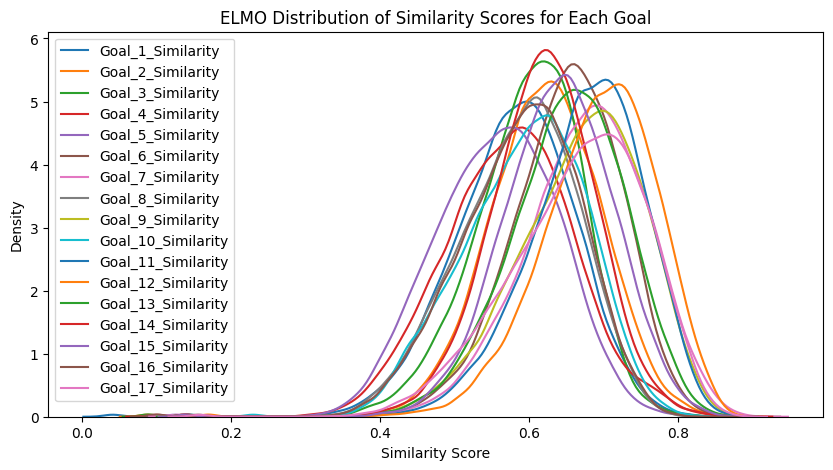

In [ ]:
plt.figure(figsize=(10, 5))
for col in similarity_columns:
    sns.kdeplot(scores_df[col], label=col)

plt.xlabel('Similarity Score')
plt.ylabel('Density')
plt.title(f'{model.upper()} Distribution of Similarity Scores for Each Goal')
plt.legend()
plt.show()

# Pearson Correlation Matrix

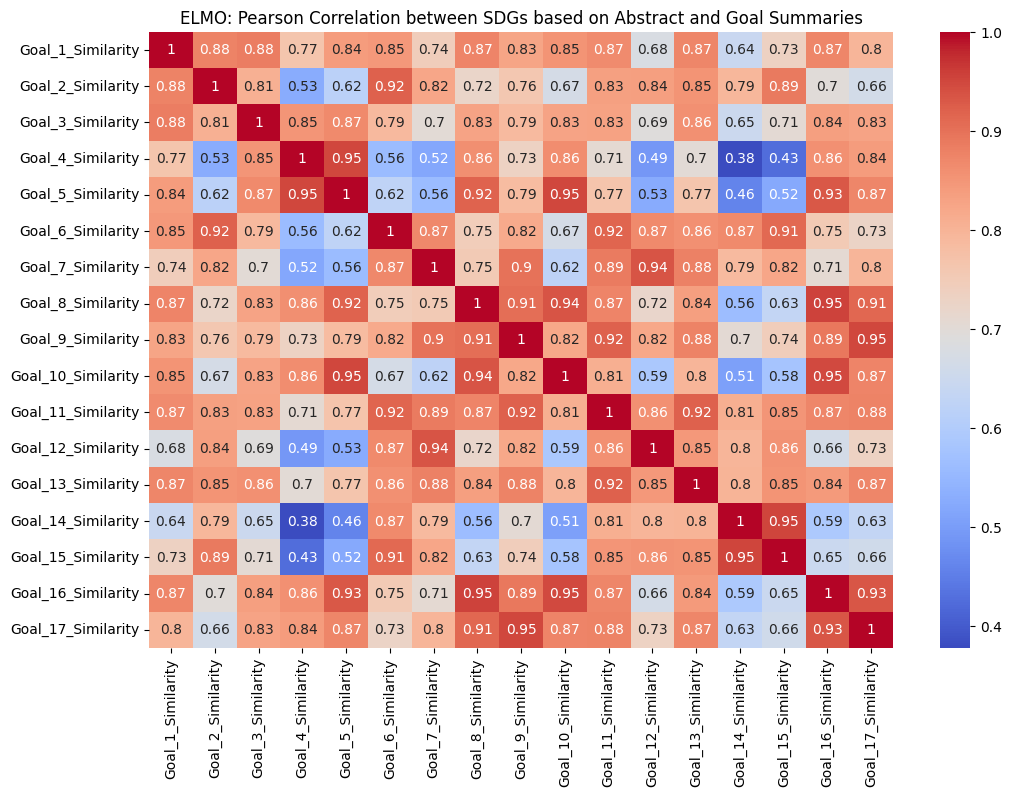

In [ ]:
# PEARSON CORRELATION MATRIX

correlation_matrix = scores_df[similarity_columns].corr()
# print(correlation_matrix)
# correlation_matrix.to_csv(f'/content/drive/MyDrive/STS Measures/correlation/{model}_summary_matrix.csv')

# Display the heatmap

plt.figure(figsize=(12, 8))
# make heatmap range -1 to 1
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title(f'{model.upper()}: Pearson Correlation between SDGs based on Abstract and Goal Summaries')
plt.show()


# Cosine Similarity Matrix

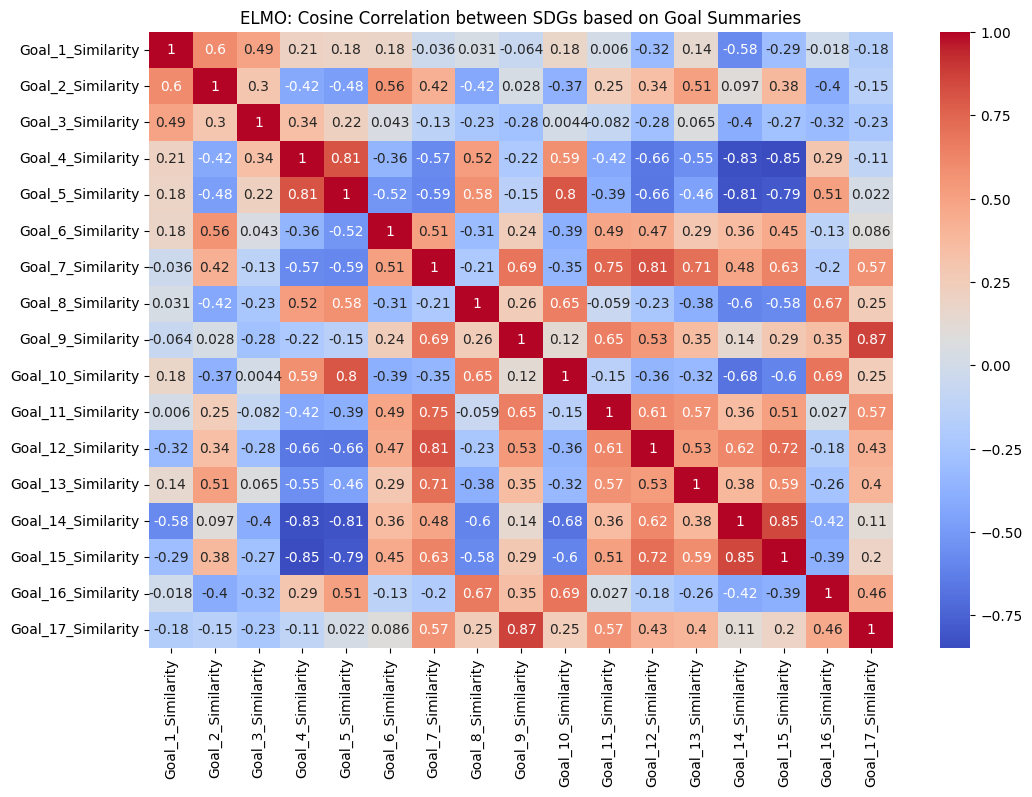

In [ ]:
similarity_columns = [col for col in model_goals.columns if col.startswith('Goal_')]

# Compute the correlation matrix
correlation_matrix = model_goals[similarity_columns].corr()
# correlation_matrix.to_csv(f'/content/drive/MyDrive/STS Measures/correlation/{model}_sdg_matrix.csv')

# Normalize the scores
if norm:
  model_goals[similarity_columns] = scaler.fit_transform(model_goals[similarity_columns])

# Display the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title(f'{model.upper()}: Cosine Correlation between SDGs based on Goal Summaries')
plt.show()

# Experimental

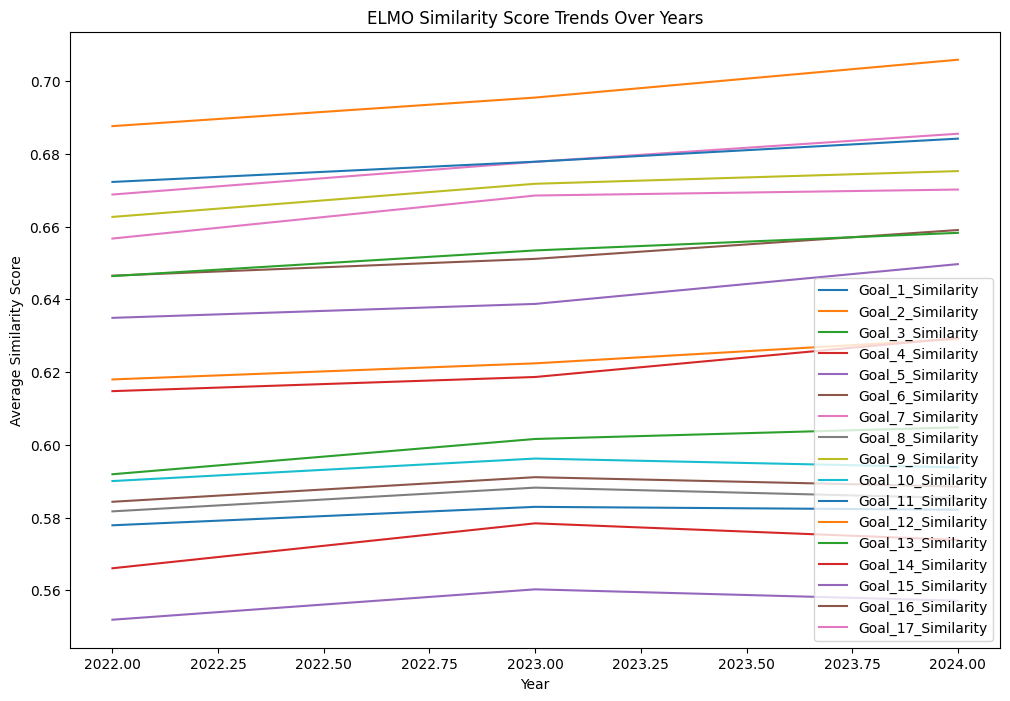

In [ ]:
scores_df['Year'] = pd.to_numeric(scores_df['Year'], errors='coerce')
yearly_similarity = scores_df.groupby('Year')[similarity_columns].mean()

plt.figure(figsize=(12, 8))
for col in similarity_columns:
    plt.plot(yearly_similarity.index, yearly_similarity[col], label=col)

plt.xlabel('Year')
plt.ylabel('Average Similarity Score')
plt.title(f'{model.upper()} Similarity Score Trends Over Years')
plt.legend()
plt.show()
